In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np, crocoddyl, random; crocoddyl.switchToNumpyArray()
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

In [13]:
%%file iteration.py
import random, numpy as np, crocoddyl
crocoddyl.switchToNumpyArray()
def iter_analysis():
    iters = []
    iters_500 = []
    iters_1000 = []
    for _ in range(10000):
        initial_config = [random.uniform(-2.1, 2.1), random.uniform(-2.1, 2.1), 0]            
        model = crocoddyl.ActionModelUnicycle()
        model.costWeights = np.matrix([4, 0.3]).T

        problem = crocoddyl.ShootingProblem(np.matrix(initial_config).T, [ model ] * 20, model)
        ddp = crocoddyl.SolverDDP(problem)
        ddp.solve([], [], 100 )
        iters.append(ddp.iter)
        
        ddp2 = crocoddyl.SolverDDP(problem)
        ddp2.solve([], [], 500 )
        iters_500.append(ddp2.iter)    
        ddp3 = crocoddyl.SolverDDP(problem)
        ddp3.solve([], [], 1000 )
        iters_1000.append(ddp3.iter)  

    del ddp, model, ddp2, ddp3    
    allowed_iterations_500 = []
    for _ in range(10000):
        initial_config = [random.uniform(-2.1, 2.1), random.uniform(-2.1, 2.1), 0]            
        model = crocoddyl.ActionModelUnicycle()
        model.costWeights = np.matrix([4, 0.3]).T

        problem = crocoddyl.ShootingProblem(np.matrix(initial_config).T, [ model ] * 20, model)
        ddp = crocoddyl.SolverDDP(problem)
        ddp.solve([], [], 500 )
        allowed_iterations_500.append(ddp.iter)    
    del model, ddp   
    allowed_iterations_1000 = []
    for _ in range(10000):
        initial_config = [random.uniform(-2.1, 2.1), random.uniform(-2.1, 2.1), 0]            
        model = crocoddyl.ActionModelUnicycle()
        model.costWeights = np.matrix([4, 0.3]).T

        problem = crocoddyl.ShootingProblem(np.matrix(initial_config).T, [ model ] * 20, model)
        ddp = crocoddyl.SolverDDP(problem)
        ddp.solve([], [], 1000 )
        allowed_iterations_1000.append(ddp.iter)  
    del ddp, model 
    failure = 0
    for i in zip(iters, iters_1000, iters_500):        
        if not (i[0] == i[1] == i[2]): failure += 1
    print("First:\n")        
    print(f"Variance of ddp.iter. For same initial points, ddp.iter remains largely the same \
    i.e. for a particular x, y, theta , ddp.solve([], [], 100/500/1000) gives the same ddp.iter. \nThis is expected, however, \
    does not give the same result in a few cases.\n \
    In this example it crocoddyl failed in {failure} instances over 10 k points.\n")
    
    print(".......................................................................\n")
    print("Second:\n")
    print("Randomly generate 10K points thrice. ")
    
    print(f"Allowed iterations : 100  |  Minimum: {min(iters)}       |  Maximum: {max(iters)}       | Average: {np.mean(iters)} |")
    print(f"Allowed iterations : 500  |  Minimum: {min(iters_500)}   |  Maximum: {max(iters_500)}   | Average: {np.mean(iters_500)} |")
    print(f"Allowed iterations : 1000 |  Minimum: {min(iters_1000)}  |  Maximum: {max(iters_1000)} | Average: {np.mean(iters_1000)} |")
    del iters, iters_500, iters_1000, allowed_iterations_500, allowed_iterations_1000
    
    
iter_analysis()

Overwriting iteration.py


In [5]:
starting_configurations, linear_velocity, angular_velocity, value_func = [], [], [], []    
iters = []

for _ in range(10000):
    initial_config = [random.uniform(-2.1, 2.1), random.uniform(-2.1, 2.1), 0]            
    model = crocoddyl.ActionModelUnicycle()

    model.costWeights = np.matrix([4, 0.3]).T

    problem = crocoddyl.ShootingProblem(np.matrix(initial_config).T, [ model ] * 20, model)
    ddp = crocoddyl.SolverDDP(problem)
    ddp.solve([], [], 100)
    ddp.xs[0]
    starting_configurations.append(ddp.xs[0])
    linear_velocity.append(ddp.us[0][0])
    angular_velocity.append(ddp.us[0][0])
    value_func.append(sum(d.cost for d in ddp.datas()))
    iters.append(ddp.iter)

starting_configurations = np.squeeze(np.array(starting_configurations))
x = starting_configurations[0:,0]
y = starting_configurations[0:,1]
#z = value_func
#z = angular_velocity
z = linear_velocity


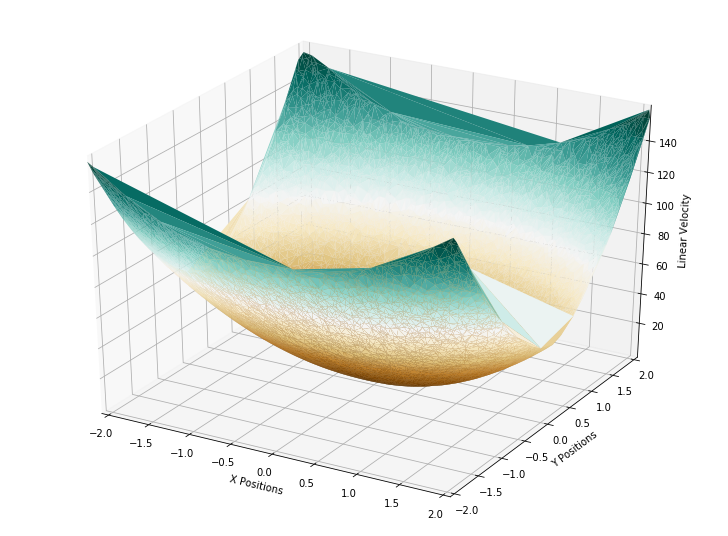

In [6]:
plt.rcParams["figure.figsize"] = 12.8, 9.6
crocoddyl.switchToNumpyArray()
cmap = plt.get_cmap('jet')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X Positions")
ax.set_ylabel("Y Positions")
ax.set_zlabel("Linear Velocity")
ax.set_xlim([-2., 2.])
ax.set_ylim([-2., 2])
#ax.scatter3D(x, y, z )
ax.plot_trisurf(x, y, value_func, cmap='BrBG', linewidth= 1)
ax.view_init(elev=30)

plt.show()

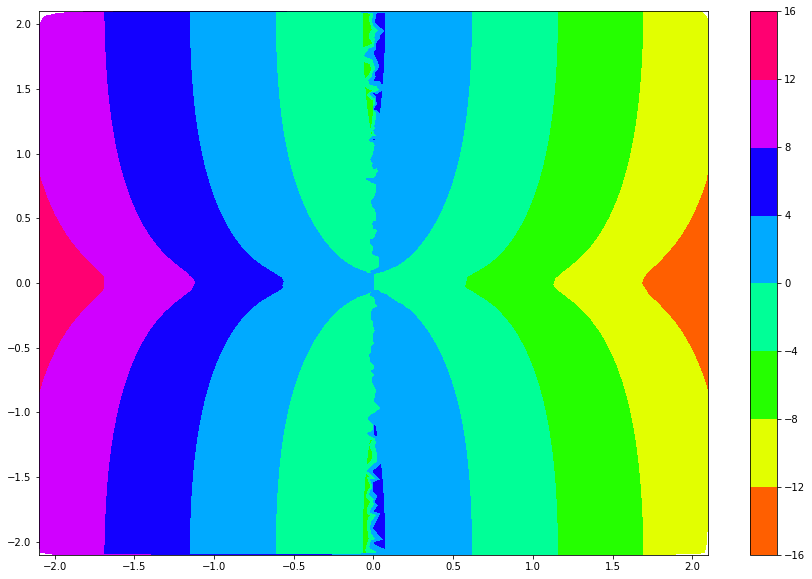

In [11]:
plt.figure(figsize=(15, 10))
plt.tricontourf(x,y,linear_velocity, cmap='hsv')

plt.colorbar()

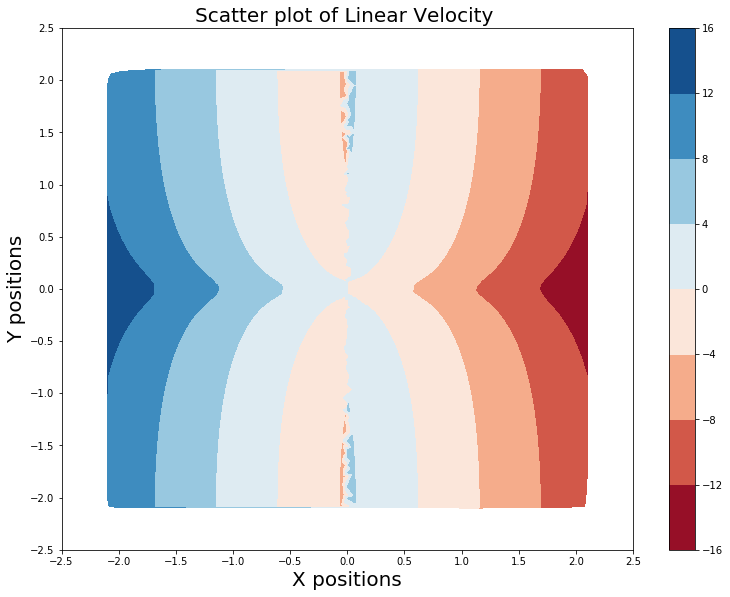

In [14]:
fig2, ax2 = plt.subplots()
ax2.set_aspect('auto')
fig2.set_facecolor('white')
ax2.set_xlim(-2.5, 2.5)
ax2.set_ylim(-2.5, 2.5)
ax2.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax2.yaxis.set_major_locator(plt.MultipleLocator(0.5))

tcf = ax2.tricontourf(x, y, linear_velocity, cmap='RdBu')
fig2.colorbar(tcf)

ax2.set_title('Contour plot of user-specified triangulation')
ax2.set_xlabel('X positions', fontsize = 20)
ax2.set_ylabel('Y positions', fontsize = 20)
ax2.set_title("Scatter plot of Linear Velocity ", fontsize = 20)

plt.show()